In [0]:
#@title Auteur : Mohamed BEN SAAD et Elias ABDELLI

In [0]:
#@title Fichier import
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.neural_network import MLPRegressor
from sklearn import datasets
from sklearn.neural_network import MLPClassifier
from sklearn import decomposition
from sklearn import preprocessing

In [0]:
#@title A) Régression avec un Perceptron Multi-Couches

In [0]:
#@title Création des données
x = np.linspace(0,8,20).reshape(-1,1)
y = np.sin(x) + np.random.randn(20)*0.2

In [0]:
#@title Apprentissage MLPRegressor
MLP = MLPRegressor(hidden_layer_sizes=(3,), activation='logistic', learning_rate_init=0.1, max_iter=200)
a = MLP.fit(x,y)
z = a.predict(x)

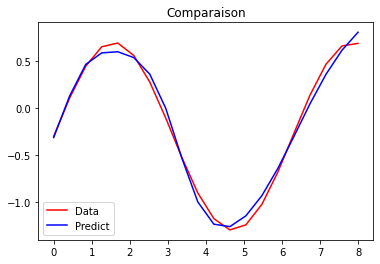

In [135]:
#@title Visualisation des données et du predict
plt.plot(x[:,0],y[:,0],label='Data',c='r')
plt.plot(x[:,0],z[:,0],label='Predict',c='b')
plt.title('Comparaison')
plt.legend()
plt.show()

In [0]:
#@title B) Classification avec un Perceptron Multi-Couches

In [0]:
#@title Chargement des données Irisdata
iris = datasets.load_iris()
idx = iris.target != 2 
irisdata = iris.data[idx].astype(np.float32) 
iristarget = iris.target[idx].astype(np.float32) 

In [136]:
#@title MLPClassifier logistic
MLP = MLPClassifier(hidden_layer_sizes=(2,), activation='logistic', learning_rate_init=0.2, max_iter=100)
a = MLP.fit(irisdata,iristarget)
z = a.predict(irisdata)
print('Prediction\n',z)
print('Pourcentage d\'erreurs :',float(sum(z != iristarget)/len(z)))

Prediction
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1.]
Pourcentage d'erreurs : 0.0


In [83]:
#@title MLPClassifier solver='lbfgs'
clf = MLPClassifier(hidden_layer_sizes=(2,), activation='logistic', solver='lbfgs',learning_rate_init=0.1, max_iter=100)
a = clf.fit(irisdata,iristarget)
z = a.predict(irisdata)
print('Prediction\n',z)
print('Pourcentage d\'erreurs :',float(sum(z != iristarget)/len(z)))

Prediction
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1.]
Pourcentage d'erreurs : 0.0


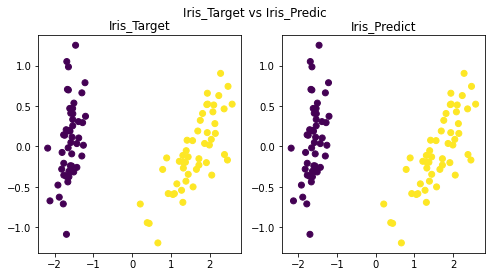

In [120]:
#@title Iris_Target vs Iris_Predic
pca = decomposition.PCA(n_components=2)
irisdata_PCA = pca.fit(irisdata).transform(irisdata)
fig = plt.figure(figsize=(8,4))
fig.suptitle('Iris_Target vs Iris_Predic')
axs = fig.add_subplot(1,2,1)
axs.scatter(irisdata_PCA[:,0],irisdata_PCA[:,1],c=iristarget)
plt.title("Iris_Target")
axs = fig.add_subplot(1,2,2)
axs.scatter(irisdata_PCA[:,0],irisdata_PCA[:,1],c=z)
plt.title("Iris_Predict")
plt.show()

In [85]:
#@title Normalisation Iris
normalized_iris = preprocessing.normalize(irisdata)
norm_MLP = MLPClassifier(hidden_layer_sizes=(2,), activation='identity', solver='lbfgs',learning_rate_init=0.2, max_iter=100)
a = norm_MLP.fit(normalized_iris,iristarget)
z = a.predict(normalized_iris)
print('Prediction\n',z)
print('Pourcentage d\'erreurs :',float(sum(z != iristarget)/len(z)))

Prediction
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1.]
Pourcentage d'erreurs : 0.0


In [0]:
#@title C) Réduction de dimensions avec un Perceptron Multi-Couches

Text(0.5, 1.0, 'Logistic')

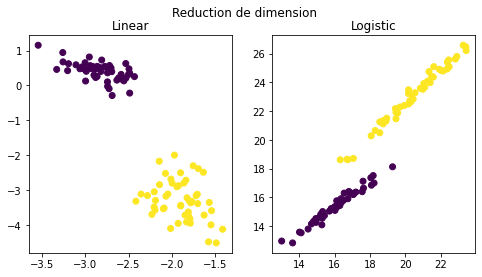

In [114]:
fig = plt.figure(figsize=(8,4))
fig.suptitle('Reduction de dimension')

MLP_reg = MLPRegressor(hidden_layer_sizes=(2,), activation='identity', learning_rate_init =0.2)
a = MLP_reg.fit(irisdata, irisdata)
X,Y = a.coefs_
Iris_X = np.dot(irisdata,X)
ax1 = fig.add_subplot(1,2,1)
ax1.scatter(Iris_X[:,0],Iris_X[:,1], c=iristarget)
plt.title('Linear')

MLP_reg = MLPRegressor(hidden_layer_sizes=(2,),activation='logistic', learning_rate_init =0.2)
a = MLP_reg.fit(irisdata, irisdata)
X, Y = a.coefs_
Iris_X = np.dot(irisdata,X)
ax1 = fig.add_subplot(1,2,2)
ax1.scatter(Iris_X[:,0],Iris_X[:,1], c=iristarget)
plt.title('Logistic')